In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
Na = 6.0221409e+23
A3tocm3 = (10**(-8))**3
Convert = 1/Na/A3tocm3

# Load data, skipping the first two lines
Glass = np.loadtxt('glass.txt', skiprows=2)

# Extract Temperature and Density
Temperature = Glass[:, 1]
Density = Convert * Glass[:, 3] / Glass[:, 2]

# Define the linear model for fitting
def linear_model(x, a, b):
    return a*x + b

# Fit the model to the first 15 and last 15 data points
params1, _ = curve_fit(linear_model, Temperature[:15], Density[:15])
params2, _ = curve_fit(linear_model, Temperature[-15:], Density[-15:])

# Generate points for plotting the fitted lines
xx = np.linspace(Temperature[0], Temperature[-1], 200)
yy1 = linear_model(xx, *params1)
yy2 = linear_model(xx, *params2)

# Find the intersection
diff = np.abs(yy1 - yy2)
index = np.argmin(diff)
Gt = xx[index]

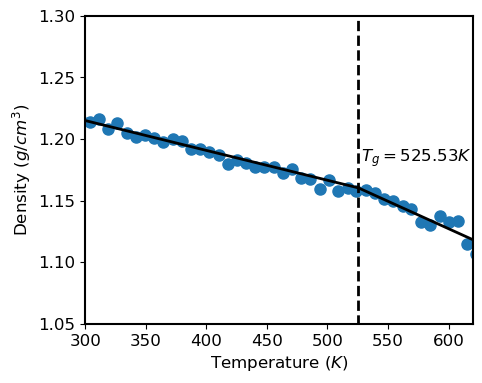

In [51]:
# Plotting
plt.figure(figsize=(5, 4))
plt.plot(Temperature, Density, 'o', label='Original Data', linewidth=2, markersize=8)
plt.plot(xx[:index], yy1[:index], '-k', linewidth=2)
plt.plot(xx[index:], yy2[index:], '-k', linewidth=2)
plt.plot([xx[index], xx[index]], [0, 10], '--k', linewidth=2)
plt.xlim([300, 620])
plt.ylim([1.05, 1.3])
plt.ylabel('Density $(g/cm^3)$', fontsize=12)
plt.xlabel('Temperature $(K)$', fontsize=12)

# Adjust text position to ensure it is inside the plot
text_x = xx[index] +2   # Adjust x position based on intersection x-value
text_y = 1.05 + (1.3 - 1.05) / 2  # Place the text slightly above the bottom of the plot
txt = '$T_g = {:.2f} K$'.format(Gt)
plt.text(text_x, text_y, txt, fontsize=12, verticalalignment='bottom')

plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.box(on=True)
plt.savefig('scatter.png')
plt.show()
